# Prueba del moelo con imágenes reales

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

2023-01-04 19:25:43.159635: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-04 19:25:43.586701: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/teresababio/miniconda3/envs/core/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-04 19:25:43.586753: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-04 19:25:45.896587: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnv

In [2]:
def matriz_confusion(labels, pred):

    res = confusion_matrix(labels,pred)
    print(1)
    plt.figure(0,figsize=(20,20))
    plt.title("Confusion Matrix")
    sns.heatmap(res, annot=True)
    
    
    np.fill_diagonal(res,0 )
    plt.figure(1, figsize=(20,20))
    plt.title("Confusion Matrix")
    sns.heatmap(res, annot=True)
    
    plt.show()

In [3]:
data_dir = os.getcwd()

path = data_dir + '/FullIJCNN2013'
modelo = os.path.join(data_dir, '..', 'datos', 'modelos_finales', 'modelo_cnn.h5' )
# Tamaño de imagenes 

IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

NUM_CATEGORIES = 43

print('Total trainable classes: ',NUM_CATEGORIES)
modelo

Total trainable classes:  43


'/home/teresababio/FinalProject/Proyecto_Final/imagenes_completas/../datos/modelos_finales/modelo_cnn.h5'

In [4]:
os.path.join(data_dir, '..', 'datos', 'modelos_finales', 'model_cnn_aug.h5')

'/home/teresababio/FinalProject/Proyecto_Final/imagenes_completas/../datos/modelos_finales/model_cnn_aug.h5'

In [5]:
#dataframe con las fotos y los recuadros donde se encuentra la señal
df_gt = pd.read_csv(path+'/gt.txt', sep=';', names=["name", "y1", "x1", "y2", "x2", "label"])

In [6]:
#No todas las imagenes del conjunto tiene señales y, por ello, no se encuentran en gt
list_elim = []
images = os.listdir(path)

for img in images:
    if df_gt[df_gt["name"] == img].empty and img not in ["gt.txt", "ReadMe.txt"]:
        list_elim.append(img)

In [7]:
#Leemos las imagenes que esten en el cojunto de datos
image_data = []
path = data_dir + '/FullIJCNN2013'
images = sorted(os.listdir(path))

for img in images:
    if img not in list_elim:
        try:
            image = np.asarray(Image.open(path + '/' + img))
            image_data.append([img, image])
        except:
            print("Error in " + img)
        
        
list_data = image_data

Error in ReadMe.txt
Error in gt.txt


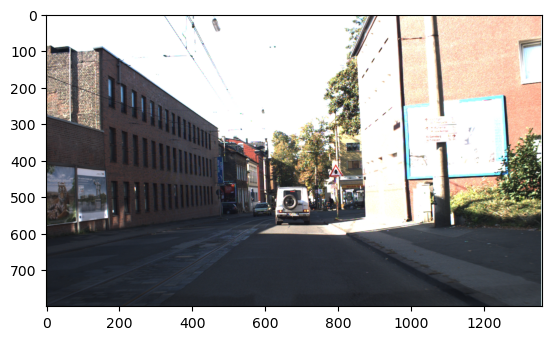

In [8]:
plt.imshow(image_data[0][1])

In [9]:
df_gt[df_gt["name"] == image_data[0][0]]

,name,y1,x1,y2,x2,label
0,00000.ppm,774,411,815,446,11


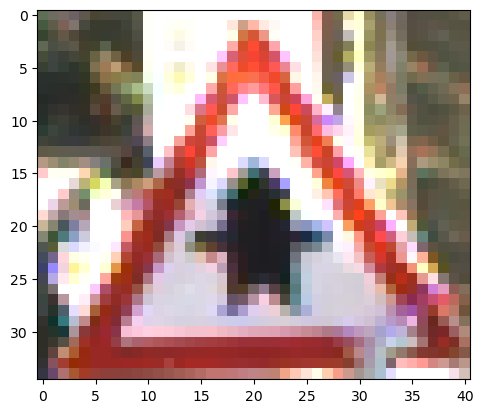

In [10]:
plt.imshow(image_data[0][1][df_gt.iloc[0]["x1"]:df_gt.iloc[0]["x2"],df_gt.iloc[0]["y1"]:df_gt.iloc[0]["y2"],:])

In [11]:
#Tomamos las señales existentes en cada una de las imágenes, cambiamos el tamaño al necesitado para
#el modelo y dividimos por 255

list_indices = []
test = []
for name, image in  image_data:
    lst = list(df_gt[df_gt["name"] == name].index)
    for i in lst:
        if name != df_gt.loc[i, "name"]:
            print(False)
    for i in lst:
        x1 = df_gt.iloc[i]["x1"]
        x2 = df_gt.iloc[i]["x2"]
        y1 = df_gt.iloc[i]["y1"]
        y2 = df_gt.iloc[i]["y2"]
        img = image[x1 : x2 , y1 : y2, : ]
        print(img.shape, i)
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
        test.append(img)
    
    list_indices.extend(lst)

list_test = test
test = np.array(test)
test.shape

(35, 41, 3) 0
(44, 41, 3) 1
(58, 56, 3) 2
(55, 58, 3) 3
(116, 114, 3) 4
(23, 23, 3) 5
(23, 22, 3) 6
(31, 32, 3) 7
(67, 69, 3) 8
(52, 49, 3) 9
(114, 112, 3) 10
(64, 63, 3) 11
(39, 39, 3) 12
(26, 26, 3) 13
(37, 37, 3) 14
(24, 24, 3) 15
(78, 76, 3) 16
(60, 50, 3) 17
(77, 70, 3) 18
(54, 55, 3) 19
(75, 77, 3) 20
(19, 20, 3) 21
(36, 38, 3) 22
(57, 58, 3) 23
(106, 123, 3) 24
(20, 23, 3) 25
(31, 31, 3) 26
(56, 58, 3) 27
(42, 43, 3) 28
(35, 37, 3) 29
(49, 52, 3) 30
(25, 25, 3) 31
(79, 76, 3) 32
(94, 90, 3) 33
(57, 61, 3) 34
(29, 31, 3) 35
(37, 41, 3) 36
(34, 33, 3) 37
(40, 39, 3) 38
(55, 55, 3) 39
(55, 55, 3) 40
(54, 58, 3) 41
(26, 26, 3) 42
(43, 42, 3) 43
(26, 26, 3) 44
(47, 49, 3) 45
(32, 31, 3) 46
(26, 29, 3) 47
(24, 20, 3) 48
(66, 66, 3) 49
(30, 33, 3) 50
(39, 38, 3) 51
(35, 36, 3) 52
(31, 31, 3) 53
(26, 25, 3) 54
(21, 22, 3) 55
(20, 22, 3) 56
(84, 84, 3) 57
(61, 62, 3) 58
(90, 90, 3) 59
(111, 124, 3) 60
(33, 34, 3) 61
(74, 79, 3) 62
(61, 61, 3) 63
(45, 45, 3) 64
(36, 33, 3) 65
(30, 30, 3) 

(50, 49, 3) 573
(52, 53, 3) 574
(20, 21, 3) 575
(21, 23, 3) 576
(19, 21, 3) 577
(21, 21, 3) 578
(23, 24, 3) 579
(26, 27, 3) 580
(23, 27, 3) 581
(25, 26, 3) 582
(56, 56, 3) 583
(43, 43, 3) 584
(31, 31, 3) 585
(34, 34, 3) 586
(33, 32, 3) 587
(26, 25, 3) 588
(24, 26, 3) 589
(43, 43, 3) 590
(42, 42, 3) 591
(39, 39, 3) 592
(41, 39, 3) 593
(39, 39, 3) 594
(41, 41, 3) 595
(118, 119, 3) 596
(120, 123, 3) 597
(46, 46, 3) 598
(48, 48, 3) 599
(47, 47, 3) 600
(47, 47, 3) 601
(24, 24, 3) 602
(23, 23, 3) 603
(23, 23, 3) 604
(24, 24, 3) 605
(40, 40, 3) 606
(39, 39, 3) 607
(39, 39, 3) 608
(39, 39, 3) 609
(29, 34, 3) 610
(29, 33, 3) 611
(64, 64, 3) 612
(65, 65, 3) 613
(39, 39, 3) 614
(40, 40, 3) 615
(25, 25, 3) 616
(23, 23, 3) 617
(64, 66, 3) 618
(63, 66, 3) 619
(64, 72, 3) 620
(48, 48, 3) 621
(47, 46, 3) 622
(49, 44, 3) 623
(50, 49, 3) 624
(69, 65, 3) 625
(87, 95, 3) 626
(42, 40, 3) 627
(36, 35, 3) 628
(47, 46, 3) 629
(48, 48, 3) 630
(34, 34, 3) 631
(35, 35, 3) 632
(23, 27, 3) 633
(22, 24, 3) 634
(24,

(47, 52, 3) 1110
(40, 44, 3) 1111
(25, 27, 3) 1112
(102, 112, 3) 1113
(22, 23, 3) 1114
(24, 23, 3) 1115
(29, 33, 3) 1116
(29, 32, 3) 1117
(22, 22, 3) 1118
(29, 29, 3) 1119
(35, 35, 3) 1120
(26, 25, 3) 1121
(43, 39, 3) 1122
(37, 31, 3) 1123
(66, 72, 3) 1124
(23, 23, 3) 1125
(120, 110, 3) 1126
(39, 39, 3) 1127
(46, 46, 3) 1128
(61, 57, 3) 1129
(25, 28, 3) 1130
(32, 35, 3) 1131
(54, 61, 3) 1132
(29, 29, 3) 1133
(27, 27, 3) 1134
(45, 45, 3) 1135
(45, 46, 3) 1136
(44, 43, 3) 1137
(45, 43, 3) 1138
(30, 30, 3) 1139
(61, 61, 3) 1140
(38, 36, 3) 1141
(30, 33, 3) 1142
(35, 35, 3) 1143
(37, 37, 3) 1144
(72, 72, 3) 1145
(53, 43, 3) 1146
(35, 35, 3) 1147
(32, 32, 3) 1148
(55, 55, 3) 1149
(50, 52, 3) 1150
(29, 28, 3) 1151
(22, 22, 3) 1152
(34, 37, 3) 1153
(73, 73, 3) 1154
(97, 108, 3) 1155
(33, 33, 3) 1156
(23, 23, 3) 1157
(87, 95, 3) 1158
(26, 28, 3) 1159
(37, 39, 3) 1160
(87, 91, 3) 1161
(76, 77, 3) 1162
(35, 35, 3) 1163
(36, 35, 3) 1164
(19, 21, 3) 1165
(87, 87, 3) 1166
(24, 24, 3) 1167
(28, 28, 

(1213, 30, 30, 3)

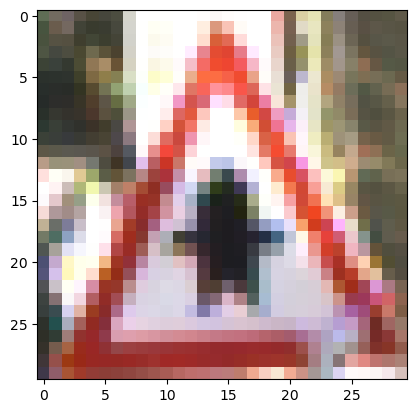

In [12]:
plt.imshow(test[0])

In [13]:
list_indices == sorted(list_indices)

True

**Modelo CNN**

In [14]:
#Cargamos el modelo
model_load = load_model(os.path.join(data_dir, '..', 'datos', 'modelos_finales', 'model_cnn.h5'))

2023-01-04 19:27:50.150447: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/teresababio/miniconda3/envs/core/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-04 19:27:50.171056: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-04 19:27:50.191014: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-FNGN17J8): /proc/driver/nvidia/version does not exist
2023-01-04 19:27:50.276669: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow wit

In [15]:
#Conjunto test

pred = model_load.predict(test) 
pred = np.argmax(pred, axis=1)

38/38 [==============================] - 5s 74ms/step


In [16]:
df_gt[ "pred"]=pred

In [17]:
df_gt

,name,y1,x1,y2,x2,label,pred
0,00000.ppm,774,411,815,446,11,11
1,00001.ppm,983,388,1024,432,40,40
2,00001.ppm,386,494,442,552,38,38
3,00001.ppm,973,335,1031,390,13,13
4,00002.ppm,892,476,1006,592,39,39
...,...,...,...,...,...,...,...
1208,00896.ppm,808,412,846,450,15,15
1209,00897.ppm,804,526,828,550,42,42
1210,00898.ppm,323,504,355,536,4,4
1211,00898.ppm,817,510,849,542,4,4


In [18]:
print('\nTest Data accuracy: ',accuracy_score(df_gt["label"], df_gt["pred"])*100)


Test Data accuracy:  94.4765045342127


1


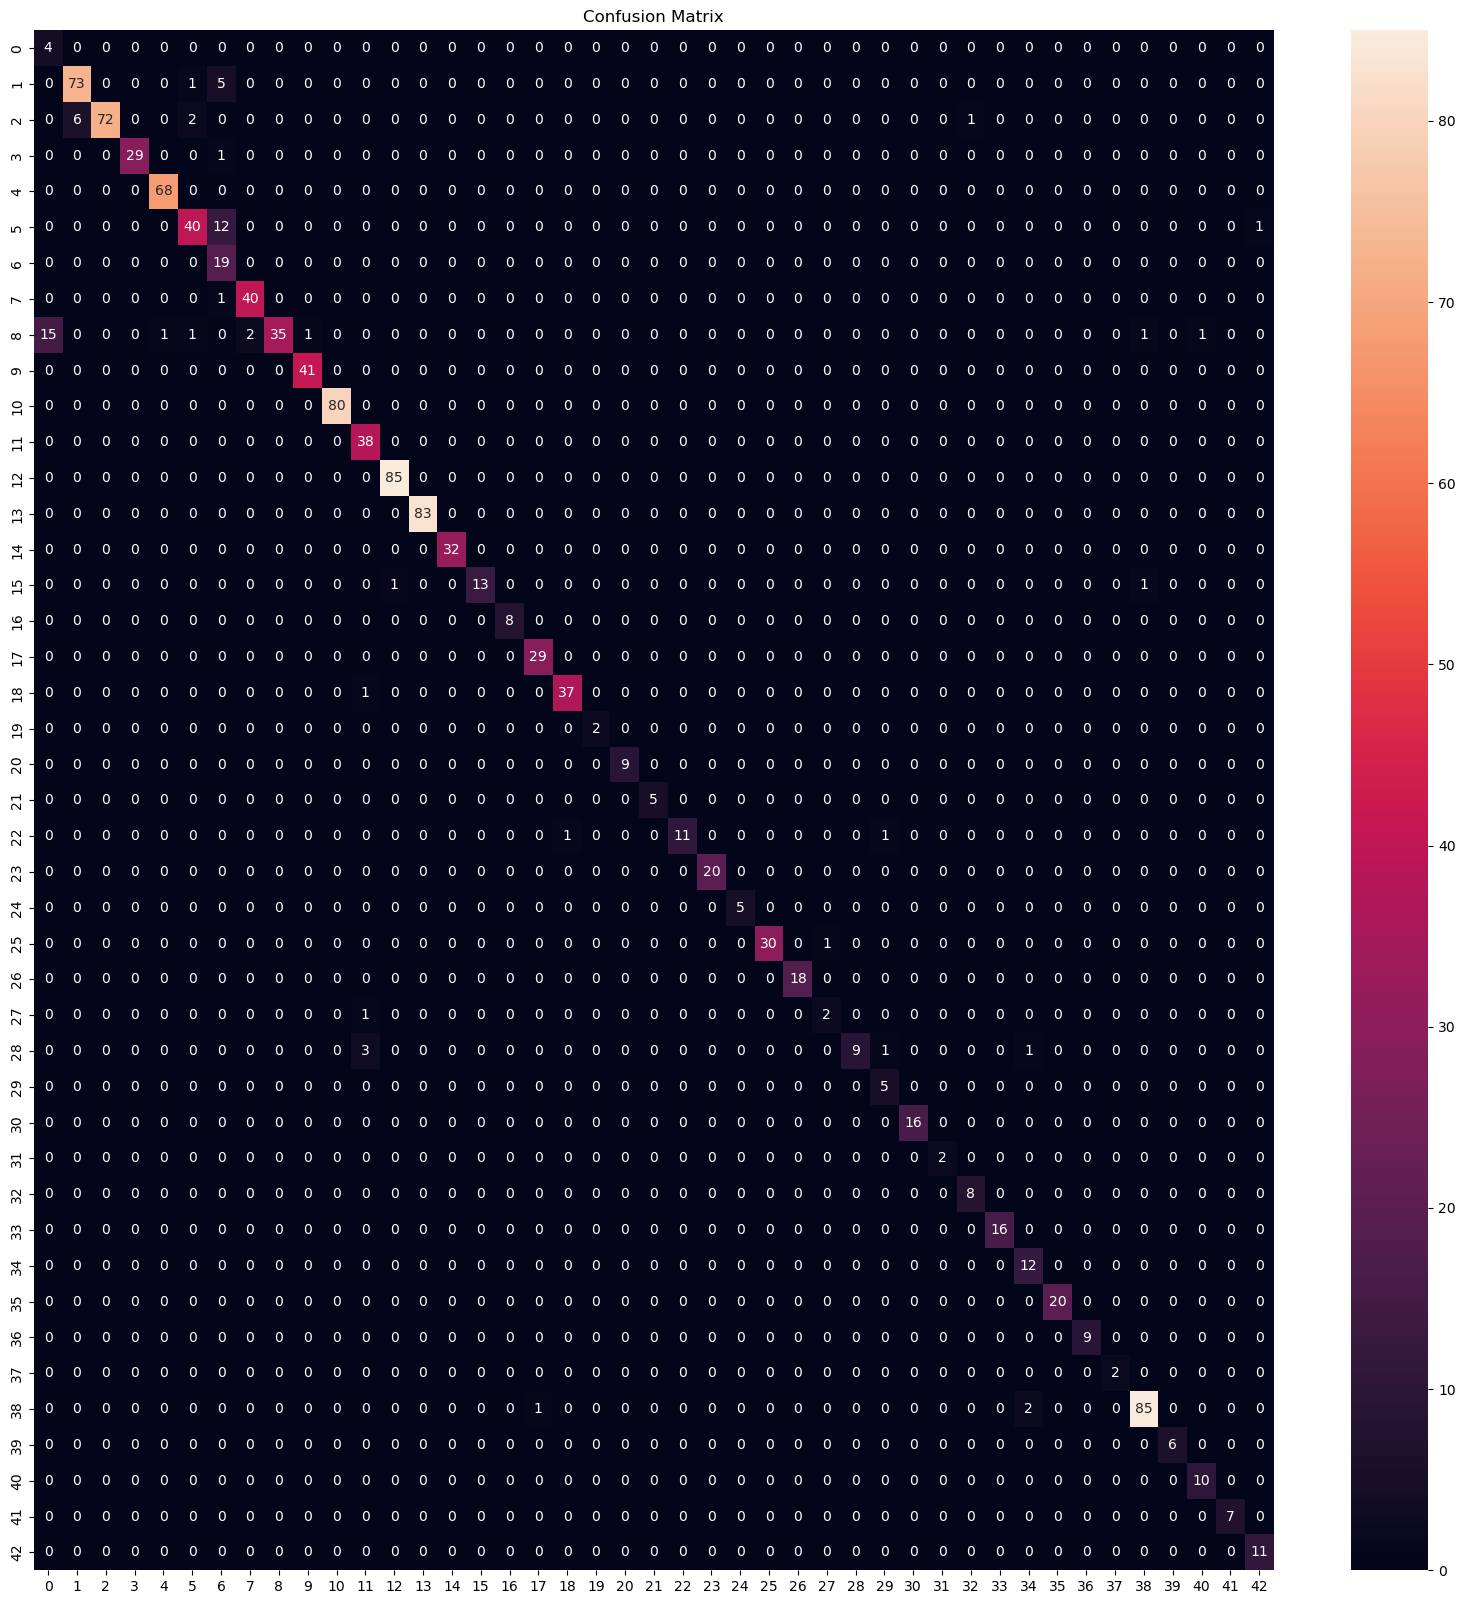

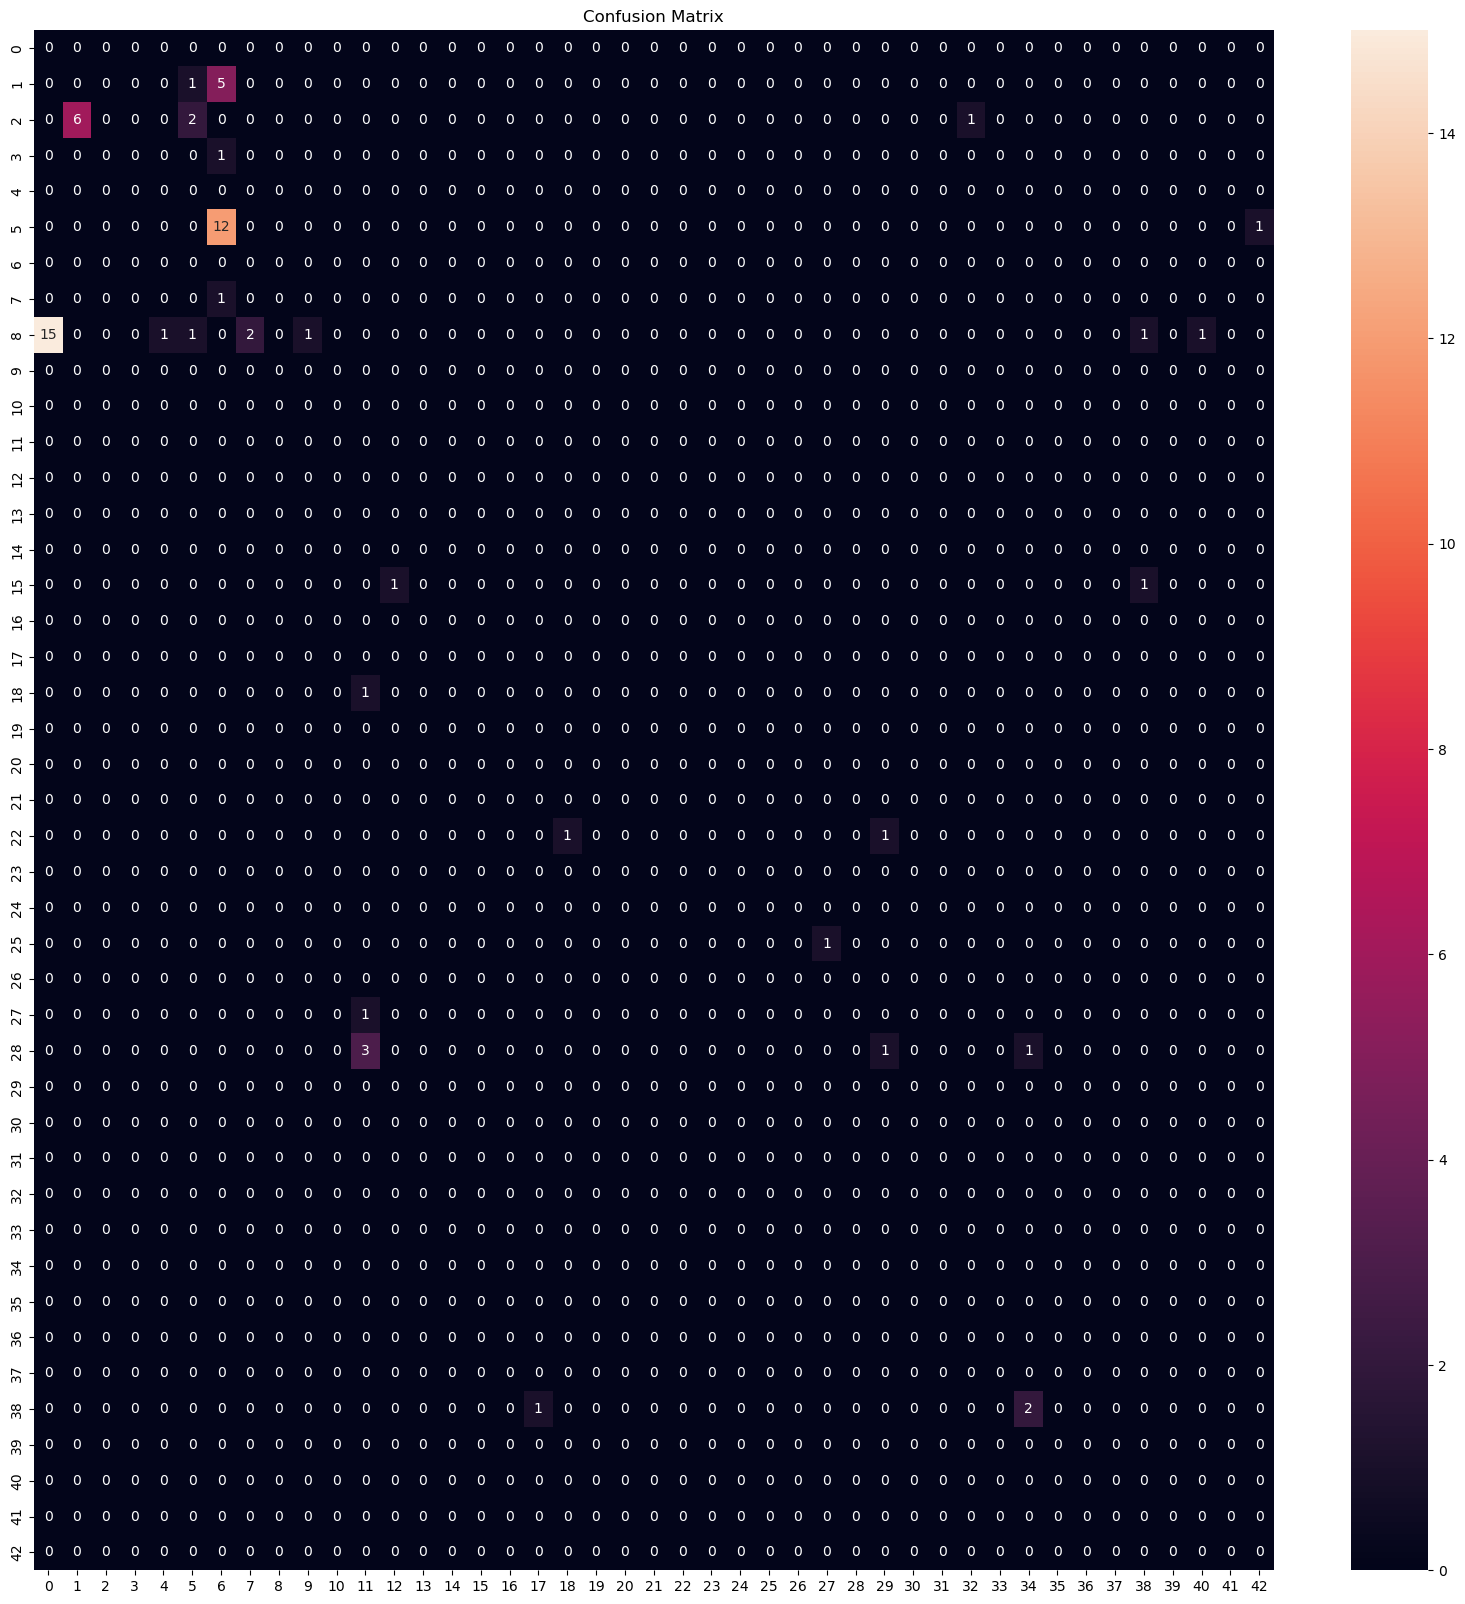

In [19]:
matriz_confusion(df_gt["label"], df_gt["pred"])

**Modelo Augmentation**

In [20]:
#Cargamos el modelo
model_load = load_model(os.path.join(data_dir, '..', 'datos', 'modelos_finales', 'model_cnn_aug.h5'))

In [21]:
#Conjunto test

pred = model_load.predict(test) 
pred = np.argmax(pred, axis=1)
df_gt[ "pred"]=pred
print('\nTest Data accuracy: ',accuracy_score(df_gt["label"], df_gt["pred"])*100)

38/38 [==============================] - 7s 135ms/step

Test Data accuracy:  87.13932399010717


1


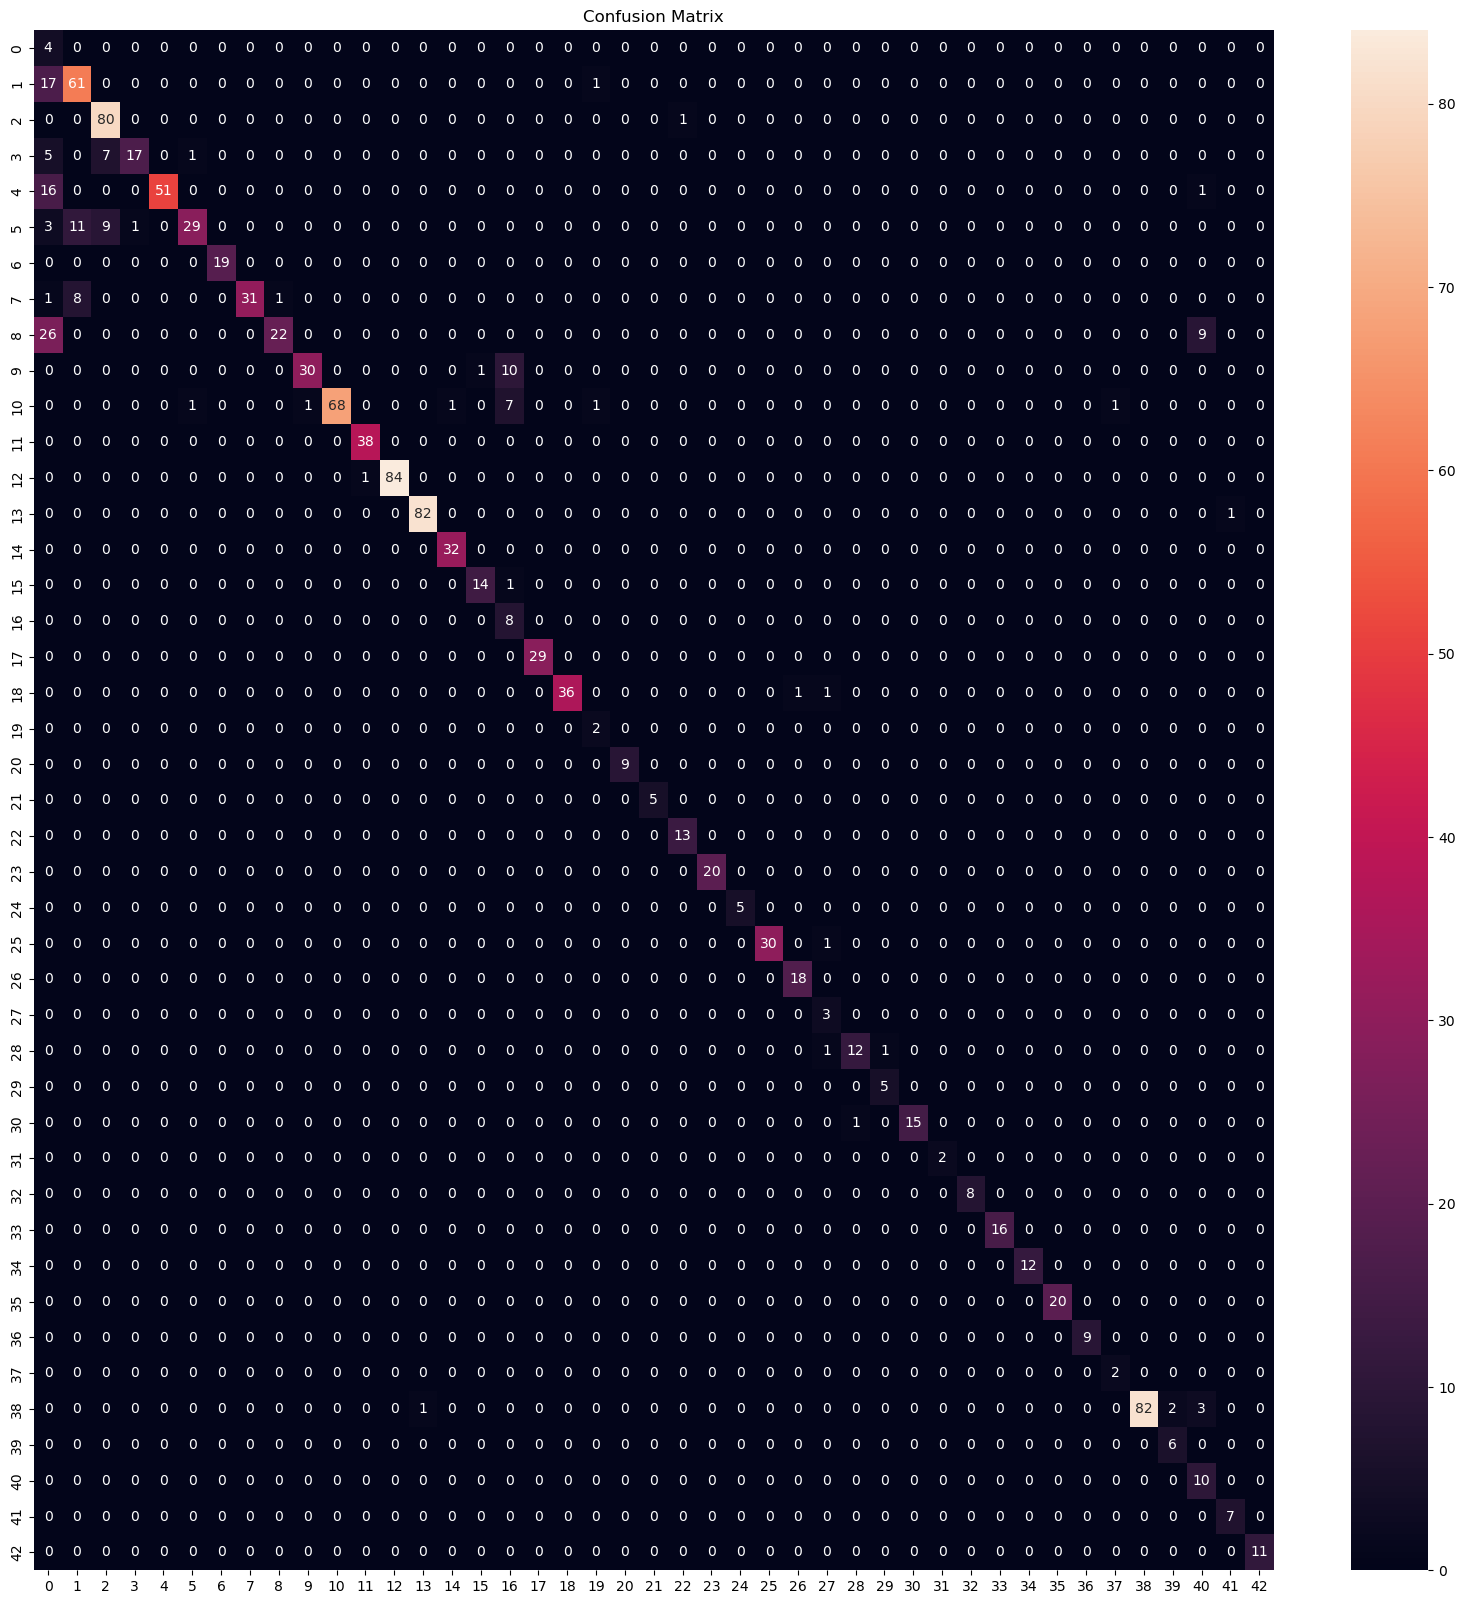

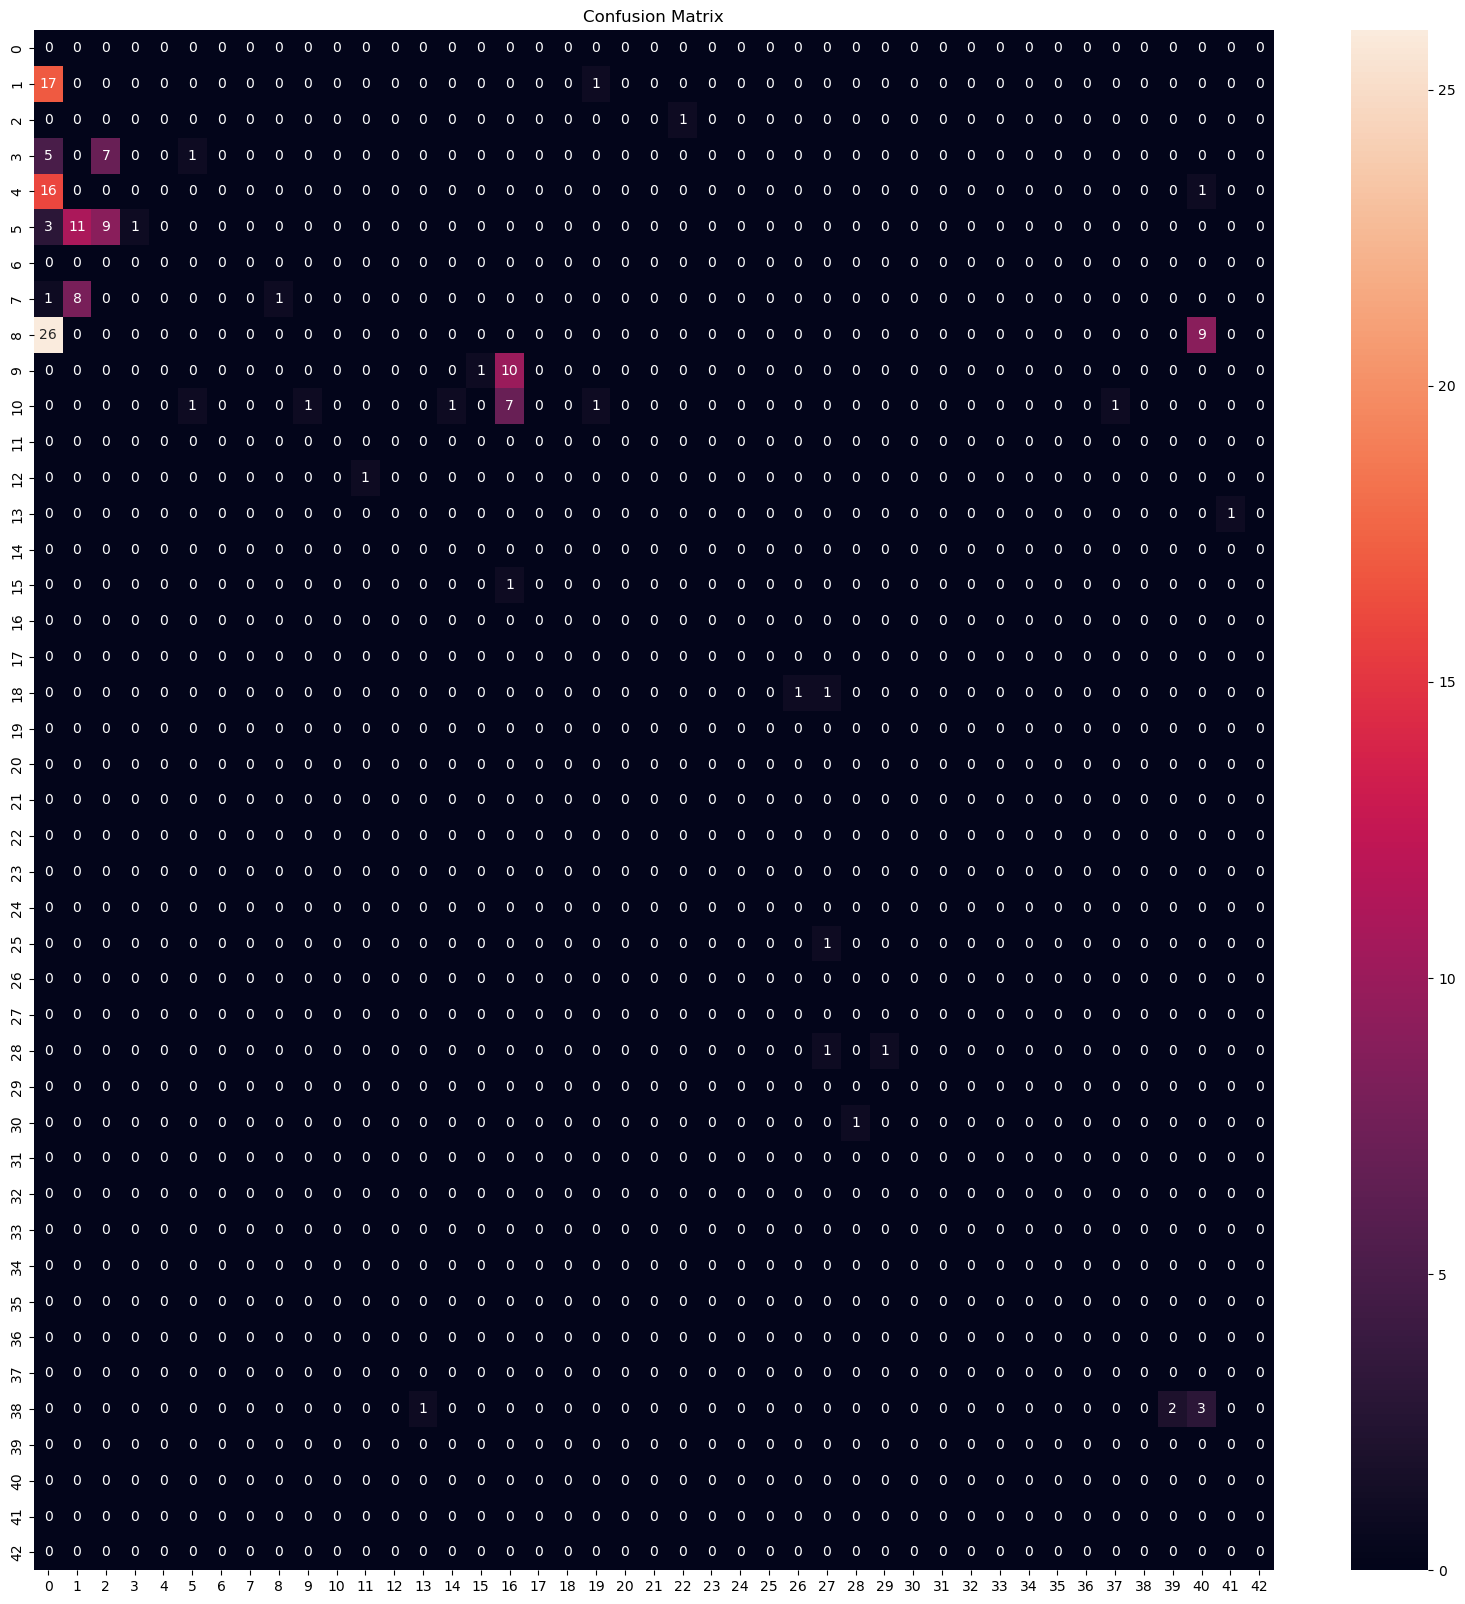

In [22]:
matriz_confusion(df_gt["label"], df_gt["pred"])